In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats 

# Lab Session Notebook - Returns

## From Prices to Returns

In this lab we'll work the very basics of Returns - computing returns, and compounding a sequence of returns.

Let's start with a set of prices for a stock "A", in a python list:

In [1]:
prices_a = [8.70, 8.91, 8.71]

Recall that the return from time $t$ to time ${t+1} is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

If you come from R or another language that supports vectors, you might expect something like this to work:

```python
returns_a = prices_a[:-1]/prices_a[1:] - 1
```

However, since Python lists do not operate as vectors, that will not work, generating an error about "/" not working for lists.


In [2]:
# WILL NOT WORK - THIS WILL GENERATE AN ERROR!
# prices_a[1:]/prices_a[:-1] -1

Instead, we can convert them to a `numpy` array. Numpy arrays _do_ behave like vectors, so this works:

In [5]:
prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [6]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

Now, let's add a few more days of prices and introduce a second stock. Let's call these two stocks "BLUE" and "ORANGE". Instead of using raw numpy arrays, we are going to use the far more powerful Pandas DataFrame, which wraps the functionality of numpy into a very convenient and easy to use data structure called a DataFrame. Note how the DtaFrame has two nicely indexed columns as well as a row index that by default runs from 0 to 4.

In [7]:
prices = pd.DataFrame(
    {
        "BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
        "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
    }
)

In [8]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


**WARNING**

However, because Pandas DataFrames will align the row index (in this case: 0, 1, 2, 3, 4) the exact same code fragment will not work as you might expect.  (see the section on row alignment in the "Crash Course" videos if this is unclear to you)

In [9]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [10]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [11]:
prices.iloc[1:]/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


We can fix this in one of several ways. First, we can extract the values of the DataFrame column which returns a numpy array, so that the DataFrame does not try and align the rows.

In [12]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


You could have also used the values in the denominator:

In [13]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


However, there are a couple of ways to do this without extracting the values, and these are probably a bit cleaner and more readable. The first option is to use the `.shift()` method on the array, which realigns the indices.

In [14]:
prices 

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Since we want to get the row at index 0 (8.84 and 10.66) to line up with the row at index 1 (8.54 and 10.30) so we can divide the 2nd row (at index 1) by the first row (at index 0) we want to shift the rows in the denominator by 1 ... which we do with `.shift(1)`

In [15]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


So, now we can obtain the returns on each day as follows:

In [16]:
returns = prices/prices.shift(1) - 1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Note how we cannot compute returns for the first day, because we dont have the closing price for the previous day. In general, we lose one data point when we go from prices to returns.

Finally, there is a built-in method in DataFrame that computes the percent change from one row to another. Since that is exactly what a return is (the percent change in price) we can just use this method to compute the return.

In [17]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


## Reading data from a CSV file
Since typing in returns is tedious, let's read the data in from a file. Pandas provides a convenient and simple way to read in a CSV file of the returns.

In [18]:
prices = pd.read_csv('../data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [19]:
returns = prices.pct_change()
returns 

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [20]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [21]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

<AxesSubplot:>

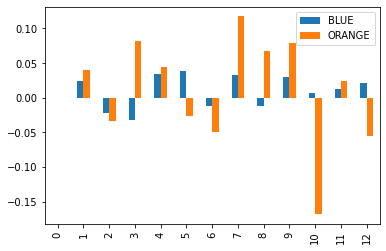

In [22]:
returns.plot.bar()

<AxesSubplot:>

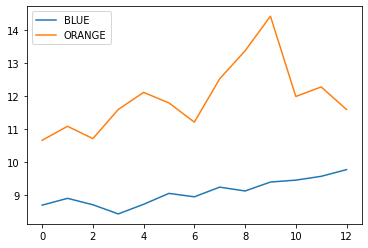

In [23]:
prices.plot()

## Compounding Returns

Now that we have a series of 12 monthly returns, we can produce the compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.

Let's compute the compounded return of our two series. 

In [24]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [25]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [26]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [27]:
(returns+1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [28]:
(((returns+1).prod() - 1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

## Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [29]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [30]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [31]:
###################################################################################################################################################
###################################################################################################################################################

# Volatility and Risk

We've seen that the volatility is measured by the average squared deviation from the mean, which is the standard deviation.

Let's read the sample returns that we've been working with.

In [32]:
prices = pd.read_csv("../data/sample_prices.csv")

In [33]:
returns = prices.pct_change()
returns 

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


Notice that the first set of returns are NaN, which is Pandas way of saying that it's an NA. We can drop that row using the `.dropna()` method.

In [34]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


Let's compute the standard deviation from first principals:

In [35]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

Let's see if we get the same answer when we use the built-in `.std()` method.

In [36]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Why don't they match? Because, by default, the `.std()` method computes the _sample standard deviation_ which means that it uses the denominator of $n-1$. On the other hand, we computed the _population_ standard deviation, which uses a numerator of $n$. Since the observed returns are thought of as observed samples from a distribution, it is probably more accurate to use the denominator of $n-1$, so let's redo our calculation to see if we get the same number.

To get the number of observations, we can use the `.shape` attribute of a DataFrame that returns a tuple of the number of rows and columns.

In [37]:
returns.shape

(12, 2)

Just as we can with a list, we can access the elements of a tuple using an index, starting at 0. Therefore, to get the number of rows in the DataFrame, we extract the 0th element of the tuple.

In [38]:
number_of_obs = returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [39]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

# Annualizing Volatility

We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation

Therefore, to annualize the volatility of a monthly series, we muiltiply it by the square root of 12. Instead of using the `np.sqrt()` we can raise it to the power of $0.5$

In [40]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

# Risk Adjusted Returns

Let's get beyond the sample data series and start working with some real data. Read in the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. Of the 10 portfolios, we only want to look at the largest cap and the smallest cap companies:

In [41]:
me_m = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [42]:
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


Note that the data is already given in percentages (i.e 4.5 instead of 0.045) and we typically want to use the actual numbers (i.e. 0.045 instead of 4.5) so we should divide the raw data from the file by 100.

In [43]:
returns = returns/100

<AxesSubplot:>

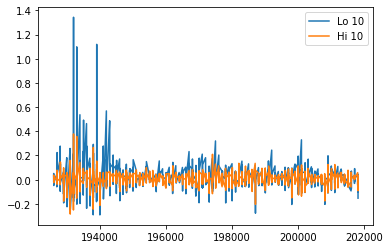

In [44]:
returns.plot()

In [45]:
returns.columns = ["SmallCap", "LargeCap"]

<AxesSubplot:>

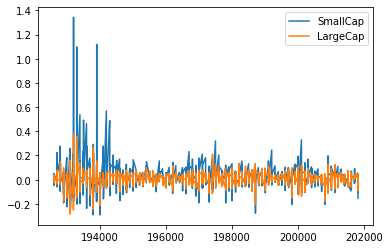

In [46]:
returns.plot()

In [47]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

We can now compute the annualized returns as follows:

In [48]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [49]:
annualized_return = (return_per_month + 1)**12-1

In [50]:
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [51]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [52]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [53]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [54]:
######################################################################################################################################################################################################
######################################################################################################################################################################################################

# Computing Maximum Drawdown

In this lab, we'll develop the code to compute the maximum drawdown of a return series, and we'll start to develop our own module which will act as a toolkit that we will add to during the course.

First, let's read the return series we processed in the previous lab:


<AxesSubplot:>

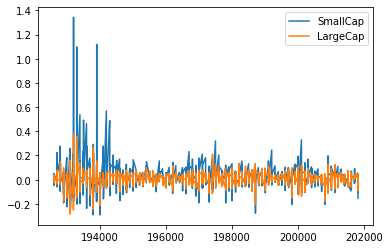

In [55]:
me_m = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

## Timeseries - forcing the index to be a datetime

We asked Pandas to `parse_dates` in `read_csv()`. Let's check if it was able to do so with the index:

In [56]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

The `dtype` is `int64` which suggests that it was not automatically converted to a date time index, so let's do that now manually. The simplest way to force it to be a timeseries is by reformatting the index data to a `datetime` type as follows:

In [57]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

Now that the DataFrame has a datetime index, we can treat the entire dataframe as a timeseries, which makes things very convenient. For instance, we can extract just the returns in 2008 as follows:

In [58]:
rets["2008"]

/home/venom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,SmallCap,LargeCap
2008-01-01,-0.0436,-0.0490
2008-02-01,-0.0203,-0.0250
2008-03-01,-0.0440,-0.0122
2008-04-01,0.0027,0.0492
2008-05-01,0.0286,0.0161
2008-06-01,-0.0816,-0.1015
2008-07-01,-0.0079,-0.0140
2008-08-01,0.0110,0.0087
2008-09-01,-0.1274,-0.1155
2008-10-01,-0.2041,-0.1763


This looks good except that we know this is monthly data, and it's showing up with an index that is date stamped. We can fix this using the `to_period` method. We'll see several more examples of Pandas support for timeseries during the course.

In [59]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [60]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [62]:
rets.describe()

,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

<AxesSubplot:>

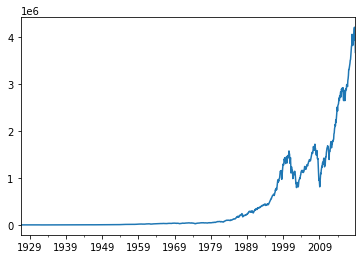

In [63]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.plot()

<AxesSubplot:>

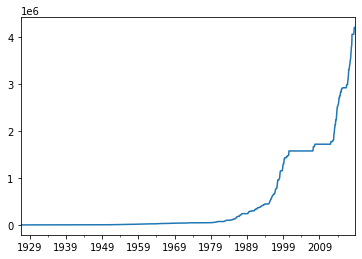

In [64]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

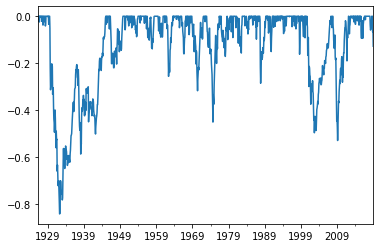

In [65]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [66]:
drawdown.min()

-0.8400375277943123

<AxesSubplot:>

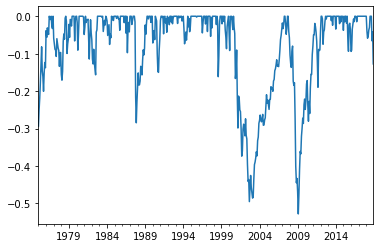

In [67]:
drawdown["1975":].plot()

In [68]:
drawdown["1975":].min()

-0.5280945042309304

# Creating a Drawdown Function

Redoing this analysis for SmallCap would be tedious, since we would need to re-enter all these commands at the prompt. Instead, let's create our first function that will form the first tool in our financial toolkit.

The function will take as input, a timeseries of returns, and return a timeseries as a DataFrame that contains the wealth index, the previous peaks and the drawdowns as a percent.

In [69]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

drawdown(rets["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [70]:
drawdown(rets["LargeCap"]).min()

Wealth            405.769102
Previous Peak    1032.900000
Drawdown           -0.840038
dtype: float64

In [71]:
drawdown(rets["SmallCap"]).min()

Wealth           491.240323
Previous Peak    985.500000
Drawdown          -0.833001
dtype: float64

In [72]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [73]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [74]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [75]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [76]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].min()

-0.6312068077252386

In [77]:
##################################################################################################################################################
##################################################################################################################################################

# Building a Module

A module in Python is conceptually not much more than a file with python code in it that you can access and run by importing the module.

When you `import` a module, you are reading the file and making the code contained in it accessible through its alias.

Start by creating a new file called `hello.py` and add the following message in there:

```python
message = 'Hello Jim'
```

and then try executing this code:

```python
import hello as h
h.message
```

Great!

Now, let's change the message. Edit the file to now say:

```python
message = 'Hello Jane'
```

and rexecute the code:

```python
import hello as h
h.message
```

What went wrong?

Since the contents of modules dont usually change very much (except during module development) Python is smart about importing modules and once a module is imported, it doesnt bother re-importing the module. Normally, this is what you want, but in our case when we are developing the module we want to force the module to geet automatically reloaded everytime it changes.

Fortunately, there is a _magic_ command sequence that does exactly that. First, we have to load an extension called `autoreload` by executing the _magic command_ `%load_ext autoreload`. Once you have loaded that extension, you now have access to a new _magic command_ called `%autoreload` which supports different modes of autoreload. The mode we want for now is to automatically reload anything that changes, which is mode 2. So, you need to execute:

```python
%load_ext autoreload
%autoreload 2
```

Now try executing:

```python
h.message
```

and you will see that future edits to the hello file will immediately be reloaded.

Try editing the `hello.py` file to:

```python
message = 'Hello John and Jane'
```

and then execute

```python
h.message
```

Now, let's create our new module, which we'll build on through the course, and put the `drawdown` function we created in that module. Create a file called `edhec_risk_kit.py` and copy the follwing code into it.

```python

import pandas as pd

def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

def get_ffme_returns():
    """
    Load the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
    rets = me_m[['Lo 10', 'Hi 10']]
    rets.columns = ['SmallCap', 'LargeCap']
    rets = rets/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    return rets

```


In [78]:
###################################################################################################################################################
###################################################################################################################################################

# Deviations from Normality

_(plus python functions with default parameters plus a quick example of recursive functions)_

Today, we'll develop the code for skewness and kurtosis even though these are already available in the `scipy.stats` module, and then we'll apply them to hedge fund index returns.

We'll also look at using `scipy.stats` module to apply the _Jarque-Bera_ test for normality, and apply them to different return series.

First, add the following code to our `edhec_risk_kit.py`

```python
def get_hfi_returns():
    """
    Load and format the EDHEC Hedge Fund Index Returns
    """
    hfi = pd.read_csv("data/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period('M')
    return hfi
```


In [2]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/venom/GitHub/EDHEC-finance-specialization/course_1_introduction_to_portfolio_construction_and_analysis_with_python/src')

import edhec_risk_kit as erk

In [6]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
hfi = erk.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [8]:
# Modify all functions in erk and add path as a variable rather than a constant 

## Skewness

Intuitively, a negative skew means that you get more negative returns than you would have expected if the returns were distributed like the normal distribution.

Another way of thinking about it is if that returns are normally distributed, the mean and the median would be very close.

However, if they are negatively skewed, the expected value i.e. the mean is less than the median. If they are positively skewed, the expected value (again, the mean) is greater than the median.

In [11]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis=1)

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


Now, let's develop the code to compute the skewness of a series of numbers.

Recall that the skewness is given by:

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$


In [12]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [13]:
skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

Just to see if we get the same answer, let's use the skewness function that is built into `scipy.stats`

In [15]:
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [16]:
# If possible use all the functions built-in in scipy instead of typing or use numpy to type for performance reasons.

So, let's add that to our `edhec_risk_kit.py`.

Finally, let's look at the skewness that you would expect from a truly random sequence of returns. Let's use the random normal generator from numpy and generate the same number of returns as we have for the hedge fund data.

In [17]:
hfi.shape

(263, 13)

In [18]:
normal_rets = np.random.normal(0, 0.15, (263, 1))

In [19]:
normal_rets.mean(), normal_rets.std()

(-0.0012488168153257956, 0.1533129446532558)

In [20]:
erk.skewness(normal_rets)

-0.17816870113093694

# Kurtosis

Intuitively, the kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

Kurtosis is given by:

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

This is very similar to the skewness, so we can just copy and paste it and then edit it to compute the 4th rather than the 3rd power (as was the case for skewness).


In [21]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [22]:
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

Note that these numbers are all lower by 3 from the number we have computed. That's because, as we said above, the expected kurtosis of a normally distributed series of numbers is 3, and `scipy.stats` is returning the _Excess Kurtosis_. We can see this by applying it on the random normal numbers we generated:

In [23]:
scipy.stats.kurtosis(normal_rets)

array([-0.24041655])

In [24]:
erk.kurtosis(normal_rets)

2.759583451551103

## Running the Jarque-Bera Test for Normality

The `scipy.stats` module contains a function that runs the _Jarque-Bera_ test on a sequence of numbers. Let's apply that to the normally generated returns:

In [25]:
scipy.stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=2.0248420519979184, pvalue=0.36333826250231116)

The first number is the test statistic and the second number is the one we want. It represents the p-value for the hypothesis test. If you want to run the test at a 1% level of significance, you want this number to be greater than 0.01 to accept the hypothesis that the data is normally distributed, and if that number is less than 0.01 then you must reject the hypothesis of normality.

In this case, since we got a number higher than 0.01 we can accept the hypothesis that the numbers are random. Now, let's try this on our different hedge fund indices.

In [26]:
scipy.stats.jarque_bera(hfi)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

Why didn't we get the results for the individual indices? Because the implementation of the test isn't smart enough to realize that we want to treat each column as a separate set of returns. We can write out own wrapper for it to fix that, so let's start by writing a simple wrapper, and adding this code to our python file:

```python
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    statistic, p_value = scipy.stats.jarque_bera(r)
    return p_value > level
```

In [27]:
erk.is_normal(normal_rets)

True

There are a few different ways to handle the problem. The first is to use the `.aggregate` method on a dataframe, that takes a function as an argument and applies that function to each column:

In [28]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

However, we can fix this in our wrapper so that we have a uniform interface to test normality:

```python
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level
```


In [29]:
erk.is_normal(normal_rets)

True

## Testing CRSP SmallCap and Large Cap returns for Normality

Let's see whether any of the returns we've been studying so far pass the normality hypothesis.

In [31]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [32]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [33]:
erk.is_normal(ffme)

SmallCap    False
LargeCap    False
dtype: bool

In [34]:
####################################################################################################################################################
####################################################################################################################################################